# Лабораторная 1 - Вариант 1
Мухина Елена и Никифорова Анастасия

10/05/2017

**Описание данных:**

Набор данных NASA содержит информацию о аэродинамических поверхностях NACA 0012 различного размера при различных скоростях аэродинамической трубы и углах атаки. Пролет аэродинамической поверхности и положения наблюдателя были одинаковы во всех экспериментах.

**Информация об атрибутах:**

Данная задача на входе принимает 5 атрибутов: 
1. Частота, в Гц. 
2. Угол атаки, в градусах. 
3. Длина хорды, в метрах. 
4. Скорость свободного потока, в метрах в секунду. 
5. Толщина всасывания бокового смещения, в метрах. 

На выходе получаем один атрибут: 
6. Измеренный уровень звукового давления, в децибелах. 

**Задача:** Мы хотим на основании признаков 1-5 предсказать уровень звукового давления (Scaled sound pressure level)

In [5]:
import pandas as pd
import numpy as np
import math
# В качестве параметра передаем имя файла и разделитель - символ, которым проводится разбиение данных в файле
inputData = pd.read_csv('airfoil1.csv', delimiter='\t')
#inputData

In [6]:
inputData = (inputData - inputData.mean()) / inputData.std()
inputData

,Frequency,Angle of Attack,Chord Length,Free-Steam Velocity,Suction side displacement thickness,Scaled sound pressure level
0,-0.661802,-1.146021,1.798701,1.312498,-0.644590,0.197873
1,-0.598362,-1.146021,1.798701,1.312498,-0.644590,0.052917
2,-0.519062,-1.146021,1.798701,1.312498,-0.644590,0.161634
3,-0.408041,-1.146021,1.798701,1.312498,-0.644590,0.399361
4,-0.281161,-1.146021,1.798701,1.312498,-0.644590,0.380517
5,-0.122560,-1.146021,1.798701,1.312498,-0.644590,0.106551
6,0.083620,-1.146021,1.798701,1.312498,-0.644590,0.052917
7,0.353241,-1.146021,1.798701,1.312498,-0.644590,-0.257288
8,0.670443,-1.146021,1.798701,1.312498,-0.644590,-0.512410
9,1.082804,-1.146021,1.798701,1.312498,-0.644590,-0.767532


Выделим целевой столбец, им будет искомый "Scaled sound pressure level"

In [7]:
targetColumn = 'Scaled sound pressure level'

# Получим имена всех столбцов и удалим оттуда целевой столбец
FeatureColumns = inputData.columns.tolist()
FeatureColumns.remove(targetColumn)
#FeatureColumns

В таблице могут содержаться пропущенные значения. Проверим, есть ли они в наших данных и если есть, то сколько их:

In [8]:
print("Null values: {0}".format(inputData.isnull().values.any()))
print("Count of NaN values: {0}".format(np.sum(inputData.isnull().values)))

Null values: False
Count of NaN values: 0


Как мы выяснили, пропущенных значений нет. Далее проверим тип данных, чтобы убедиться, что в таблице отсутствуют нечисловые значения.

In [9]:
inputData.dtypes

Frequency                              float64
Angle of Attack                        float64
Chord Length                           float64
Free-Steam Velocity                    float64
Suction side displacement thickness    float64
Scaled sound pressure level            float64
dtype: object

Все данные в нашей таблице - числовые

Продолжим работу с данными. 
Далее приступим к анализу данных.
X  - матрица атрибутов данных и  y -  вектор значений целевой переменной.

Для начала попробуем использовать стандартную линейную регрессию из пакета scikit-learn

In [10]:
X = inputData[FeatureColumns].values
y = inputData[targetColumn].values

# Сначала импортируем класс, реализующий линейную регрессию
from sklearn.linear_model import LinearRegression

# После чего создадим объект класса и выполним подгон данных по всей выборке
lr = LinearRegression()

lr.fit(X,y) # Подгон данных

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

После получения линейной регрессии, мы можем посмотреть коэффициенты и смещение:

In [11]:
print("Intercept: ", lr.intercept_)
print("Coefficients: ", lr.coef_)

Intercept:  3.3404375099e-14
Coefficients:  [-0.58594766 -0.36194402 -0.48390314  0.225407   -0.28078457]


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Получим вектор "предсказаний"
y_predict = lr.predict(X)
# В функцию передается истинное значение вектора ответов и предсказанное нашей регрессионной функцией:
test_mae_error = mean_absolute_error(y, y_predict)
test_mse_error = mean_squared_error(y, y_predict)
test_r2_error = r2_score(y, y_predict)
test_rmse_error = math.sqrt(test_mse_error)
print("MAE : {0}".format(test_mae_error))
print("MSE : {0}".format(test_mse_error))
print("R^2 coefficient : {0}".format(test_r2_error))
print("RMSE : {0}".format(test_rmse_error))

MAE : 0.5404700651314962
MSE : 0.4839680421666699
R^2 coefficient : 0.5157097420928733
RMSE : 0.6956781167800737


In [13]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True)

MAE_list_scores = []
MSE_list_scores = []
R2_list_scores = []

iteration_index = 0

# Разделение на тестовую и тренировочную выборки
for train_indexes, test_indexes in kf.split(X,y):
    iteration_index+=1
    # X_train, y_train - данные, соответствующие обучающей выборке
    X_train = X[train_indexes]
    y_train = y[train_indexes]
    
    # X_test, y_test - данные, соответствующие тренировочной выборке
    X_test = X[test_indexes]
    y_test = y[test_indexes]
    
    lr.fit(X_train, y_train) # Обучение на тестовых данных
    y_predict = lr.predict(X_test)
    
    current_mae = mean_absolute_error(y_test, y_predict)
    current_mse = mean_squared_error(y_test, y_predict)
    current_r2 = r2_score(y_test, y_predict)
    print("Iteration #{0}: MAE : {1}, MSE : {2}, R2 : {3}".format(iteration_index, current_mae, current_mse, current_r2))
    MAE_list_scores.append(current_mae)
    MSE_list_scores.append(current_mse)
    R2_list_scores.append(current_r2)

# Выведем средние значения:
print("\nOverall: ")
print("\tMAE : {0}".format(np.mean(MAE_list_scores)))
print("\tMSE : {0}".format(np.mean(MSE_list_scores)))
print("\tR^2 coefficient : {0}".format(np.mean(R2_list_scores)))

Iteration #1: MAE : 0.5380993954594238, MSE : 0.45656836657377736, R2 : 0.5310789665691015
Iteration #2: MAE : 0.49797588606844134, MSE : 0.4032507170288285, R2 : 0.5390534073644937
Iteration #3: MAE : 0.6378459300828798, MSE : 0.6362399279624593, R2 : 0.5033915924071257
Iteration #4: MAE : 0.5486709210326537, MSE : 0.5333252404417071, R2 : 0.4280792390874919
Iteration #5: MAE : 0.5768494764431712, MSE : 0.5749362134043651, R2 : 0.5191839703898657
Iteration #6: MAE : 0.5252881288269251, MSE : 0.4426214084460374, R2 : 0.4381729097026602
Iteration #7: MAE : 0.4997826298849402, MSE : 0.44322375021279203, R2 : 0.5350236182074686
Iteration #8: MAE : 0.5267099055662459, MSE : 0.44467904057711594, R2 : 0.5454852253189014
Iteration #9: MAE : 0.5442230474402849, MSE : 0.5064130026641124, R2 : 0.5015671129522749
Iteration #10: MAE : 0.5333673601052566, MSE : 0.4435800328328896, R2 : 0.5419162511260871

Overall: 
	MAE : 0.5428812680910222
	MSE : 0.4884837700144084
	R^2 coefficient : 0.50829522931

In [14]:
test_mse_error < np.mean(MSE_list_scores)

True

# Полиномиальная регрессия

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degreeList = []
maeList = []
mseList = []

kf = KFold(n_splits=7, shuffle=True)

for count, degree in enumerate(range(0,7)):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    MAE_for_current_degree = []
    MSE_for_current_degree = []
    
    for train_indexes, test_indexes in kf.split(X,y):
        # X_train, y_train - данные, соответствующие обучающей выборке
        X_train = X[train_indexes]
        y_train = y[train_indexes]
    
        # X_test, y_test - данные, соответствующие тренировочной выборке
        X_test = X[test_indexes]
        y_test = y[test_indexes]
    
        model.fit(X_train, y_train) # Обучение на тестовых данных
        y_predict = model.predict(X_test)
        
        current_mae = mean_absolute_error(y_test, y_predict)
        current_mse = mean_squared_error(y_test, y_predict)
        
        MAE_for_current_degree.append(current_mae)
        MSE_for_current_degree.append(current_mse)
    
    print("Degree: {0}".format(degree))
    print("\tMAE : {0}".format(np.mean(MAE_for_current_degree)))
    print("\tMSE : {0}".format(np.mean(MSE_for_current_degree)))
    degreeList.append(degree)
    maeList.append(np.mean(MAE_for_current_degree))
    mseList.append(np.mean(MSE_for_current_degree))

Degree: 0
	MAE : 0.8169818333773069
	MSE : 0.9998429825336261
Degree: 1
	MAE : 0.5417848588940666
	MSE : 0.4864285739776572
Degree: 2
	MAE : 0.466261353597056
	MSE : 0.36803090945291445
Degree: 3
	MAE : 0.39024260728810756
	MSE : 0.2613775678736438
Degree: 4
	MAE : 0.31654808959460573
	MSE : 0.18937285830828668
Degree: 5
	MAE : 0.3052049155038964
	MSE : 0.26220012468274084
Degree: 6
	MAE : 0.39542464980731656
	MSE : 2.33538791966857


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

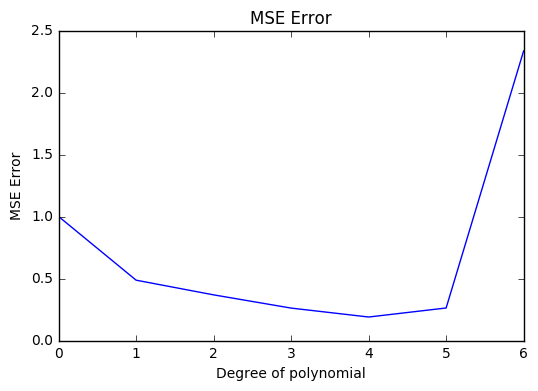

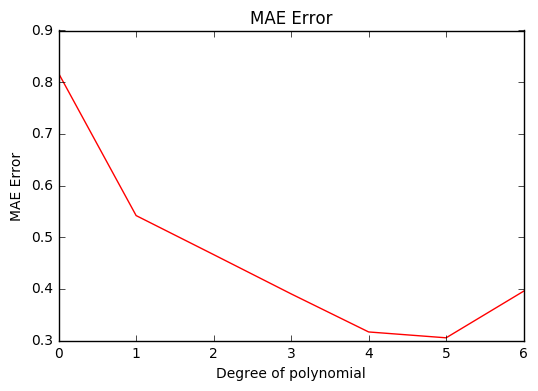

In [17]:
plt.plot(degreeList, mseList, 'b-', label='MSE')
plt.title('MSE Error')
plt.ylabel('MSE Error')
plt.xlabel('Degree of polynomial')
plt.show()

plt.plot(degreeList, maeList, 'r', label='MAE')
plt.title('MAE Error')
plt.ylabel('MAE Error')
plt.xlabel('Degree of polynomial')
plt.show()

In [18]:
model = make_pipeline(PolynomialFeatures(1), LinearRegression())
model.fit(X_train, y_train) # Обучение на тестовых данных
y_predict = model.predict(X_test)

In [19]:
print("Coefficients: {0}".format((model.get_params()['linearregression']).coef_))
print("Intercept: {0}".format((model.get_params()['linearregression']).intercept_ ))

Coefficients: [ 0.         -0.57151253 -0.38314912 -0.49013796  0.22593811 -0.26288612]
Intercept: 0.000539339567224976


In [20]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Мы выяснили, что оптимальным значением степени для полиномиальной регрессии является 1, поэтому укажем её.
optimalDegree = 4

# Будем использовать параметры по умолчанию, т.е. на данный момент не укажем значение alpha
model = make_pipeline(PolynomialFeatures(1), Ridge())
kf = KFold(n_splits=10, shuffle=True)

MAE_list = []
MSE_list = []

for train_indexes, test_indexes in kf.split(X,y):
    # X_train, y_train - данные, соответствующие обучающей выборке
    X_train = X[train_indexes]
    y_train = y[train_indexes]
    
    # X_test, y_test - данные, соответствующие тренировочной выборке
    X_test = X[test_indexes]
    y_test = y[test_indexes]
    
    model.fit(X_train, y_train) # Обучение на тестовых данных
    y_predict = model.predict(X_test)
        
    current_mae = mean_absolute_error(y_test, y_predict)
    current_mse = mean_squared_error(y_test, y_predict)
        
    MAE_list.append(current_mae)
    MSE_list.append(current_mse)
print("\tMAE : {0}".format(np.mean(MAE_list)))
print("\tMSE : {0}".format(np.mean(MSE_list)))    

print("Coefficients: {0}".format((model.get_params()['ridge']).coef_))
print("Intercept: {0}".format((model.get_params()['ridge']).intercept_ ))

	MAE : 0.5436274648658364
	MSE : 0.4902942639008588
Coefficients: [ 0.         -0.56936791 -0.37101769 -0.47531609  0.21711783 -0.26802147]
Intercept: -0.012222403878225216


### Вопрос:
**Сравните и объясните полученные значения MSE и весовых коэффициентов $L_2$-регрессии со значениями линейной регрессии** 

При линейной регрессии значение MSE получилось меньше, самое меньшее значение мы получили с помощью полиномиальной регрессии при 5-й степени

### $L_1$ регрессия

In [21]:
model = make_pipeline(PolynomialFeatures(1), Lasso())
kf = KFold(n_splits=10, shuffle=True)

MAE_list = []
MSE_list = []

for train_indexes, test_indexes in kf.split(X,y):
    # X_train, y_train - данные, соответствующие обучающей выборке
    X_train = X[train_indexes]
    y_train = y[train_indexes]
    
    # X_test, y_test - данные, соответствующие тренировочной выборке
    X_test = X[test_indexes]
    y_test = y[test_indexes]
    
    model.fit(X_train, y_train) # Обучение на тестовых данных
    y_predict = model.predict(X_test)
        
    current_mae = mean_absolute_error(y_test, y_predict)
    current_mse = mean_squared_error(y_test, y_predict)
        
    MAE_list.append(current_mae)
    MSE_list.append(current_mse)
print("\tMAE : {0}".format(np.mean(MAE_list)))
print("\tMSE : {0}".format(np.mean(MSE_list)))    

print("Coefficients: {0}".format((model.get_params()['lasso']).coef_))
print("Intercept: {0}".format((model.get_params()['lasso']).intercept_ ))

	MAE : 0.8170457214483801
	MSE : 1.0002807745587736
Coefficients: [ 0. -0. -0. -0.  0. -0.]
Intercept: -0.002314533426432345


### Вопросы:

** Сравните и объясните полученные значения MSE и весовых коэффициентов $L_1$-регрессии со значениями линейной регрессии**
Значение метрики MSE при линейной регрессии получилось меньше, чем значение MSE при L2, сделовательно лиейная регрессии оказалась эффективнее.

** Какие значения были отброшены моделью, в процессе $L_1$-регуляризации? **
В процессе L1 регуляризации были отброшены значения 3-го и 5-го признаков из сета данных (Chord Length и Suction side displacement thickness), так как модель присвоила им нулевые коэффиценты.

** Сравните и объясните полученные значения MSE и весовых коэффициентов $L_1$-регрессии со значениями $L_2$-регрессии**
Значение MSE у Ridge регрессии ближе к данным, полученным изначально, значение у Lasso значительно отличается. 

** Что лучше использовать для данной задачи: $L_1$ или $L_2$ регрессию?**
Для данной задачи лучше использовать Ridge регуляризацию, так как она более устойчива для данного набора данных и она более эффективна при наличии кореллирующих признаков (в данном наборе 4 и 5 столбцы).

### Подбор гиперпараметра в задаче регрессии

In [22]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

MAE_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
MSE_scorer = make_scorer(mean_squared_error, greater_is_better=False)

In [23]:
n_alphas = 200 # 200 значений
alphas = np.logspace(-10, 2, n_alphas)
alphas

array([  1.00000000e-10,   1.14895100e-10,   1.32008840e-10,
         1.51671689e-10,   1.74263339e-10,   2.00220037e-10,
         2.30043012e-10,   2.64308149e-10,   3.03677112e-10,
         3.48910121e-10,   4.00880633e-10,   4.60592204e-10,
         5.29197874e-10,   6.08022426e-10,   6.98587975e-10,
         8.02643352e-10,   9.22197882e-10,   1.05956018e-09,
         1.21738273e-09,   1.39871310e-09,   1.60705282e-09,
         1.84642494e-09,   2.12145178e-09,   2.43744415e-09,
         2.80050389e-09,   3.21764175e-09,   3.69691271e-09,
         4.24757155e-09,   4.88025158e-09,   5.60716994e-09,
         6.44236351e-09,   7.40196000e-09,   8.50448934e-09,
         9.77124154e-09,   1.12266777e-08,   1.28989026e-08,
         1.48202071e-08,   1.70276917e-08,   1.95639834e-08,
         2.24780583e-08,   2.58261876e-08,   2.96730241e-08,
         3.40928507e-08,   3.91710149e-08,   4.50055768e-08,
         5.17092024e-08,   5.94113398e-08,   6.82607183e-08,
         7.84282206e-08,

In [24]:
#parameters = {'alpha':alphas}
parameters = {'alpha': alphas, 'fit_intercept' : [True, False]}

In [25]:
clf = GridSearchCV(Ridge(), parameters, scoring  = MAE_scorer) 
clf.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-10,   1.14895e-10, ...,   8.70359e+01,   1.00000e+02]), 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(mean_absolute_error, greater_is_better=False),
       verbose=0)

In [26]:
clf.best_params_

{'alpha': 1e-10, 'fit_intercept': False}

In [27]:
clf.best_score_

-0.55528547220923608

In [28]:
clf.best_estimator_

Ridge(alpha=1e-10, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [29]:
clf1 = GridSearchCV(Ridge(), parameters, scoring  = MSE_scorer)
clf1.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-10,   1.14895e-10, ...,   8.70359e+01,   1.00000e+02]), 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)

In [30]:
clf1.best_params_

{'alpha': 6.222570836730231, 'fit_intercept': False}

In [31]:
clf1.best_score_

-0.51172685942043794

In [32]:
clf1.best_estimator_

Ridge(alpha=6.222570836730231, copy_X=True, fit_intercept=False,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [33]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Мы выяснили, что оптимальным значением степени для полиномиальной регрессии является 4, поэтому укажем её.
optimalDegree = 4

# передаем лучший estimator, подобранный с помощью GridSearchCV
model = make_pipeline(PolynomialFeatures(4), clf.best_estimator_)
kf = KFold(n_splits=5, shuffle=True)

MAE_list = []
MSE_list = []

for train_indexes, test_indexes in kf.split(X,y):
    # X_train, y_train - данные, соответствующие обучающей выборке
    X_train = X[train_indexes]
    y_train = y[train_indexes]
    
    # X_test, y_test - данные, соответствующие тренировочной выборке
    X_test = X[test_indexes]
    y_test = y[test_indexes]
    
    model.fit(X_train, y_train) # Обучение на тестовых данных
    y_predict = model.predict(X_test)
        
    current_mae = mean_absolute_error(y_test, y_predict)
    current_mse = mean_squared_error(y_test, y_predict)
        
    MAE_list.append(current_mae)
    MSE_list.append(current_mse)
print("\tMAE : {0}".format(np.mean(MAE_list)))
print("\tMSE : {0}".format(np.mean(MSE_list)))    

print("Coefficients: {0}".format((model.get_params()['ridge']).coef_))
print("Intercept: {0}".format((model.get_params()['ridge']).intercept_ ))

	MAE : 0.3261237942813048
	MSE : 0.223985068041271
Coefficients: [  2.67255135e+00  -1.66510269e+00  -1.34386402e+01  -2.47213054e+00
   1.55497739e+00   1.14696860e+01   2.61883436e-01  -1.06161575e+00
   4.25685070e-01   8.33006875e-02   7.07810726e-02  -3.77477516e-01
  -1.29862937e+01  -8.53971733e-01  -2.38258228e+01  -2.48360694e+00
   4.32531476e-01   6.39776171e+00   1.55663684e-01   1.78866784e+00
   1.04272157e+01   3.53619090e-01  -4.37740740e-01   7.43291420e-01
  -7.87050318e-02   1.76363770e+00  -2.11118250e+00  -3.56222084e+00
   1.67769279e-01   2.77725379e+00  -2.58452840e-01   6.18583362e-02
   3.21391365e+00  -6.17406314e-02  -1.77370870e-01  -3.66099597e-01
   2.84751182e+00   1.63708279e+01  -1.15897603e+00  -5.89670842e+00
   1.05196498e+01  -1.86511440e+00  -4.42551018e+01   7.58945028e-01
   1.19097916e+00  -3.16326209e+00   2.94474028e+00  -3.03328943e-01
  -7.78111006e+00   3.73784479e-01   2.44954625e+00   1.92643193e+01
  -7.44841763e-02  -1.07022134e+00  -5

### Задача 4.2

In [34]:
model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1e-10, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [35]:
parameters = {'ridge__alpha': alphas, 'ridge__fit_intercept' : [True, False]}

In [36]:
clf = GridSearchCV(model, parameters, scoring  = MSE_scorer)
clf.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1e-10, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'ridge__fit_intercept': [True, False], 'ridge__alpha': array([  1.00000e-10,   1.14895e-10, ...,   8.70359e+01,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)

In [37]:
clf.best_params_

{'ridge__alpha': 100.0, 'ridge__fit_intercept': False}

In [38]:
clf.best_score_

-1.2860065796831401

In [39]:
# передаем лучший estimator, подобранный с помощью GridSearchCV
kf = KFold(n_splits=5, shuffle=True)

MAE_list = []
MSE_list = []
new_model = clf.best_estimator_

for train_indexes, test_indexes in kf.split(X,y):
    # X_train, y_train - данные, соответствующие обучающей выборке
    X_train = X[train_indexes]
    y_train = y[train_indexes]
    
    # X_test, y_test - данные, соответствующие тренировочной выборке
    X_test = X[test_indexes]
    y_test = y[test_indexes]
    
    new_model.fit(X_train, y_train) # Обучение на тестовых данных
    y_predict = new_model.predict(X_test)
        
    current_mae = mean_absolute_error(y_test, y_predict)
    current_mse = mean_squared_error(y_test, y_predict)
        
    MAE_list.append(current_mae)
    MSE_list.append(current_mse)
    
print("\tMAE : {0}".format(np.mean(MAE_list)))
print("\tMSE : {0}".format(np.mean(MSE_list)))    

print("Coefficients: {0}".format((new_model.get_params()['ridge']).coef_))
print("Intercept: {0}".format((new_model.get_params()['ridge']).intercept_ ))

	MAE : 0.40617534457399895
	MSE : 0.28122007679619443
Coefficients: [ 0.01402577 -0.53098219 -0.07400098 -0.23966959  0.09713533 -0.14580423
 -0.05874485 -0.10293873 -0.20274901  0.02504322 -0.06618392 -0.02339492
  0.01626803  0.00109481 -0.0039772   0.02450044  0.03623887  0.01900384
 -0.01795561  0.01497264 -0.01428318 -0.02654292 -0.00623068  0.17179469
  0.03320447  0.12803598  0.12441658 -0.05801291  0.02215548 -0.01095692
  0.10991441  0.01027629  0.09097102 -0.22255764 -0.02012984 -0.08397818
 -0.07062734  0.00556453 -0.03801983 -0.04066627 -0.01187393  0.02800106
 -0.05403435 -0.0352311  -0.00375485 -0.04903981 -0.05786279  0.0166257
  0.00202902 -0.1222086   0.00792277 -0.08137062  0.06765013 -0.0710553
  0.05341563 -0.07433736 -0.00168079  0.00401451 -0.00774028 -0.00522434
 -0.09901494 -0.1255813   0.04569208  0.00854252  0.02377103 -0.01565349
 -0.01400153 -0.07317833  0.01700277 -0.00268709  0.06655094 -0.00995639
 -0.0651548   0.10251245 -0.06556746 -0.09421357 -0.063517

**Для данной задачи мы выбрали значение альфа, подобранное Ridge регрессией, равное 100.0**